In [8]:
import pandas as pd
from scipy.stats import f_oneway, ttest_rel

In [2]:
df = pd.read_csv(
    "timings.csv",
    header=None,
    names=["run", "module", "approach", "request type", "duration (s)"],
)

In [7]:
df.groupby("approach").agg({"duration (s)": ["mean", "std", "count"]})

duration (s)                
                      mean       std count
approach                                  
dataclass         3.225101  0.038335   100
explicitrange     3.229481  0.034978   100
tuple             3.218173  0.041183   100
typeddict         3.218652  0.051624   100

<Axes: title={'center': 'duration (s)'}, xlabel='approach'>

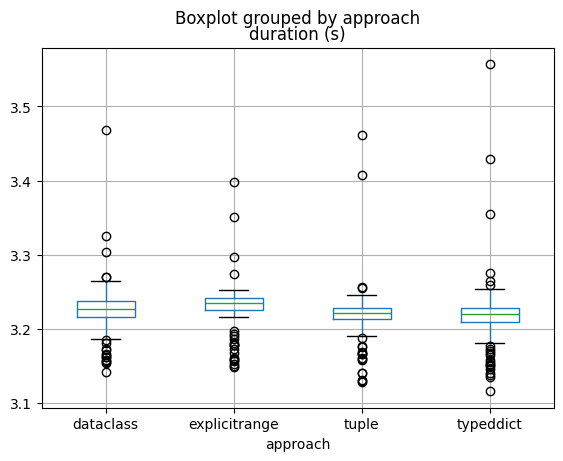

In [4]:
df.boxplot(column="duration (s)", by="approach")

In [11]:
dataclass = df[df["approach"] == "dataclass"]["duration (s)"].values
explicitrange = df[df["approach"] == "explicitrange"]["duration (s)"].values
tuplerange = df[df["approach"] == "tuple"]["duration (s)"].values
typeddict = df[df["approach"] == "typeddict"]["duration (s)"].values

In [6]:
f_oneway(dataclass, explicitrange, tuplerange, typeddict)

F_onewayResult(statistic=np.float64(1.6733648937759862), pvalue=np.float64(0.17217635711360224))

In [12]:
ttest_rel(dataclass, tuplerange)

TtestResult(statistic=np.float64(2.478233229689062), pvalue=np.float64(0.01489539210150319), df=np.int64(99))

In [13]:
ttest_rel(explicitrange, tuplerange)

TtestResult(statistic=np.float64(5.392624239584489), pvalue=np.float64(4.730703802396182e-07), df=np.int64(99))

In [14]:
ttest_rel(typeddict, tuplerange)

TtestResult(statistic=np.float64(0.0911377598937238), pvalue=np.float64(0.9275672800900243), df=np.int64(99))